In [112]:
#Dpendecies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle

# importing dataset

In [4]:
df = pd.read_csv('Salary_Data_Based_country_and_race - Salary_Data_Based_country_and_race.csv')
df

Unnamed: 0  Age  Gender    Education Level              Job Title  \
0              0   32    Male         Bachelor's      Software Engineer   
1              1   28  Female           Master's           Data Analyst   
2              2   45    Male                PhD         Senior Manager   
3              3   36  Female         Bachelor's        Sales Associate   
4              4   52    Male           Master's               Director   
...          ...  ...     ...                ...                    ...   
6695        6699   49  Female                PhD  Director of Marketing   
6696        6700   32    Male        High School        Sales Associate   
6697        6701   30  Female  Bachelor's Degree      Financial Manager   
6698        6702   46    Male    Master's Degree      Marketing Manager   
6699        6703   26  Female        High School        Sales Executive   

      Years of Experience       Salary    Country        Race  
0                     5.0   $90,000.00         UK       White  
1                     3.0   $65,000.00        USA    Hispanic  
2                    15.0  $150,000.00     Canada       White  
3                     7.0   $60,000.00        USA    Hispanic  
4                    20.0  $200,000.00        USA       Asian  
...                   ...          ...        ...         ...  
6695                 20.0  $200,000.00         UK       Mixed  
6696                  3.0   $50,000.00  Australia  Australian  
6697                  4.0   $55,000.00      China     Chinese  
6698                 14.0  $140,000.00      China      Korean  
6699                  1.0   $35,000.00     Canada       Black  

[6700 rows x 9 columns]

In [5]:
#checking numbers of rows and columns
df.shape

(6700, 9)

In [6]:
#finding null values in datasets
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 2
Country                0
Race                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6700 non-null   int64  
 1   Age                  6700 non-null   int64  
 2   Gender               6700 non-null   object 
 3   Education Level      6700 non-null   object 
 4   Job Title            6700 non-null   object 
 5   Years of Experience  6700 non-null   float64
 6   Salary               6698 non-null   object 
 7   Country              6700 non-null   object 
 8   Race                 6700 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 471.2+ KB


In [8]:
#Dropping rows containing null values.
df.dropna(inplace=True)

In [9]:
df.shape

(6698, 9)

In [10]:
df

Unnamed: 0  Age  Gender    Education Level              Job Title  \
0              0   32    Male         Bachelor's      Software Engineer   
1              1   28  Female           Master's           Data Analyst   
2              2   45    Male                PhD         Senior Manager   
3              3   36  Female         Bachelor's        Sales Associate   
4              4   52    Male           Master's               Director   
...          ...  ...     ...                ...                    ...   
6695        6699   49  Female                PhD  Director of Marketing   
6696        6700   32    Male        High School        Sales Associate   
6697        6701   30  Female  Bachelor's Degree      Financial Manager   
6698        6702   46    Male    Master's Degree      Marketing Manager   
6699        6703   26  Female        High School        Sales Executive   

      Years of Experience       Salary    Country        Race  
0                     5.0   $90,000.00         UK       White  
1                     3.0   $65,000.00        USA    Hispanic  
2                    15.0  $150,000.00     Canada       White  
3                     7.0   $60,000.00        USA    Hispanic  
4                    20.0  $200,000.00        USA       Asian  
...                   ...          ...        ...         ...  
6695                 20.0  $200,000.00         UK       Mixed  
6696                  3.0   $50,000.00  Australia  Australian  
6697                  4.0   $55,000.00      China     Chinese  
6698                 14.0  $140,000.00      China      Korean  
6699                  1.0   $35,000.00     Canada       Black  

[6698 rows x 9 columns]

In [11]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

# Education
## To ensure consistent analysis, we should standardize entries at the same level.

In [12]:
df['Education Level']=df['Education Level'].replace("Bachelor's Degree","Bachelor's")
df['Education Level']=df['Education Level'].replace("Master's Degree","Master's")
df['Education Level']=df['Education Level'].replace("phD","PhD")

In [13]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

## Now all entries are standardize at the same level

# Exploratory Data Analysis

## Number of entries from each country

In [14]:
country_ = df['Country'].value_counts().reset_index()
country_.columns = ['country','count']
country_

country  count
0        USA   1359
1      China   1343
2  Australia   1336
3         UK   1335
4     Canada   1325

## visualization

Text(0.5, 1.0, 'Number of entries from each country')

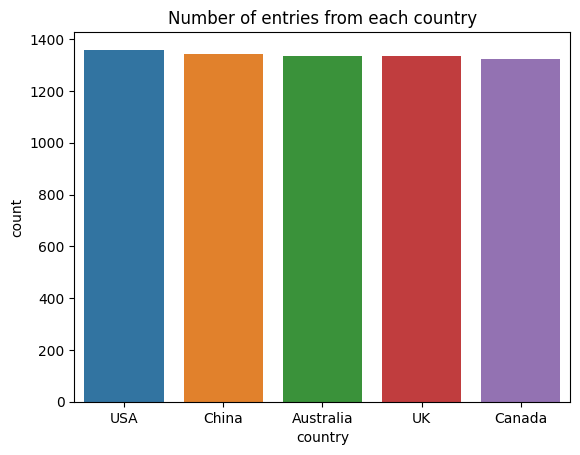

In [15]:
sns.barplot(country_,x='country',y='count',hue='country', dodge=False)
# fig = px.bar(country_,x='country',y='count',color='country')
plt.title("Number of entries from each country")

# Number of people form different races

In [16]:
Race_ = df['Race'].value_counts().reset_index()
Race_.columns = ['race','count']
Race_

race  count
0             White   1962
1             Asian   1603
2            Korean    457
3        Australian    452
4           Chinese    444
5             Black    437
6  African American    354
7             Mixed    334
8             Welsh    333
9          Hispanic    322

Text(0.5, 1.0, 'Number of people from different races')

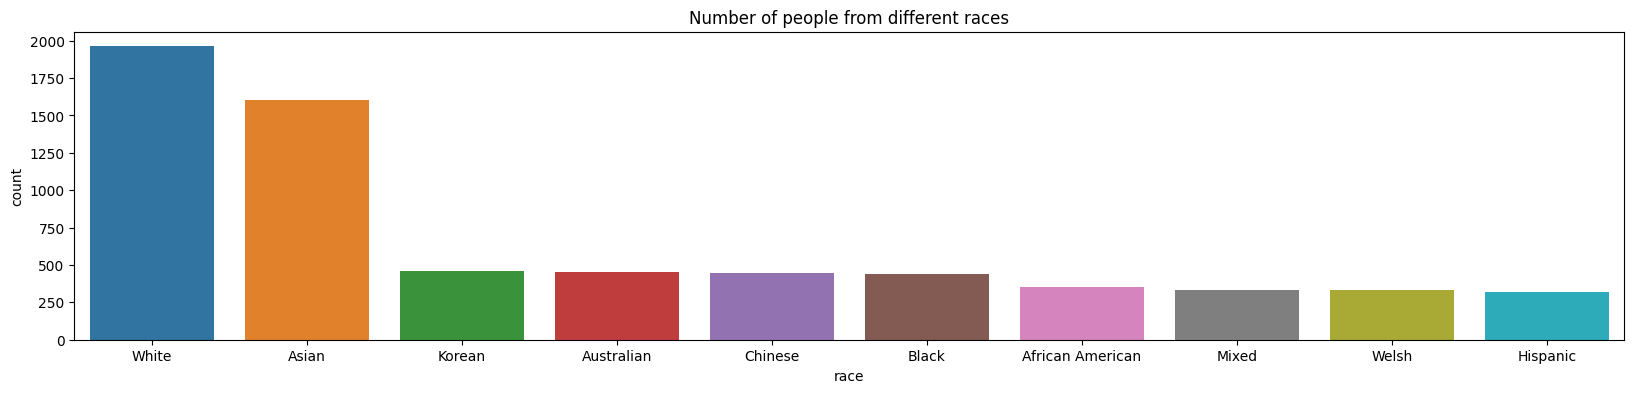

In [17]:
plt.figure(figsize=(20,4))
sns.barplot(Race_,x='race',y='count',hue='race',dodge=False)
plt.title("Number of people from different races")

### We can see here most of the  people from White race and Asian race   

# Analyzing Relationship between salary and their education level

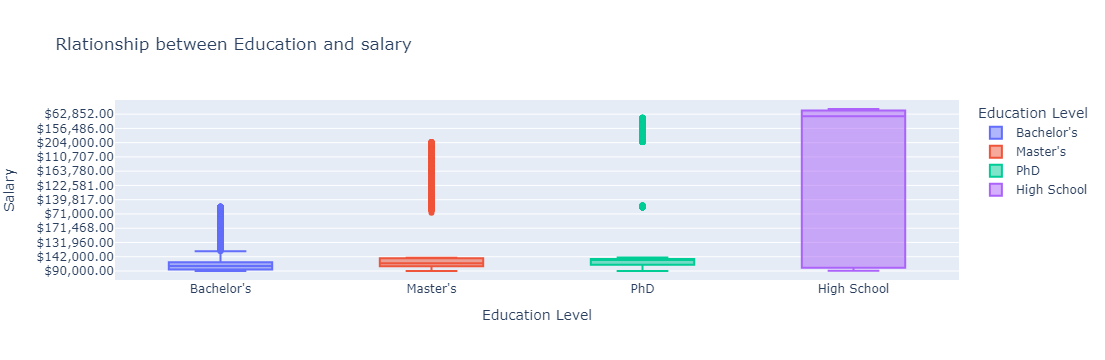

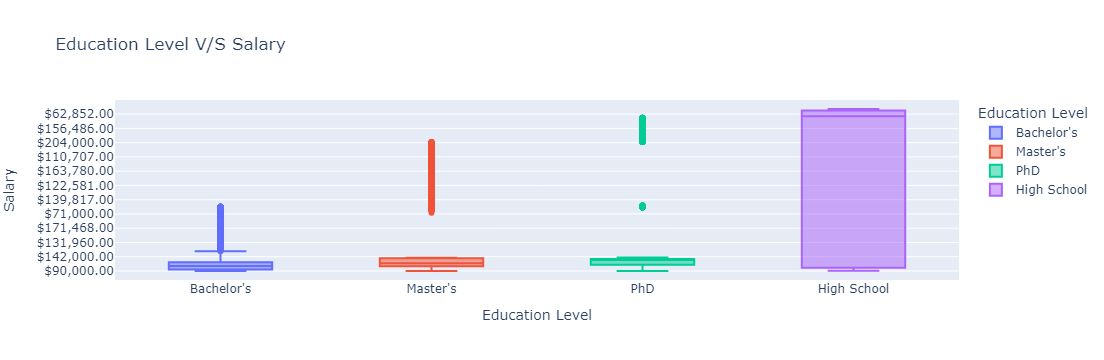

In [18]:
fig = px.box(df, x="Education Level", y="Salary", title='Rlationship between Education and salary',color='Education Level')
fig.show()
img = Image.open('images/newplot.png')
display(img)

### PhD graduates earn the highest salaries compared to graduates of any other educational level, while high school graduates typically earn the least.
### Most of the "Other" gender people only have "High School" educational level.

# Analyzing Relationship between salary and Gender

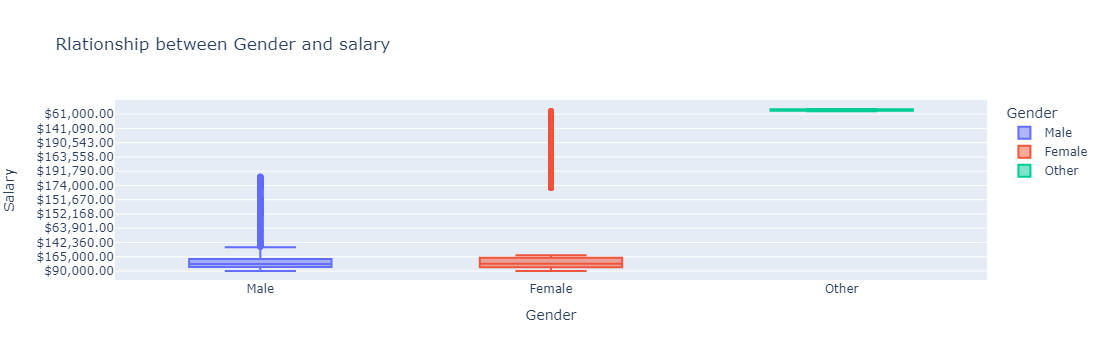

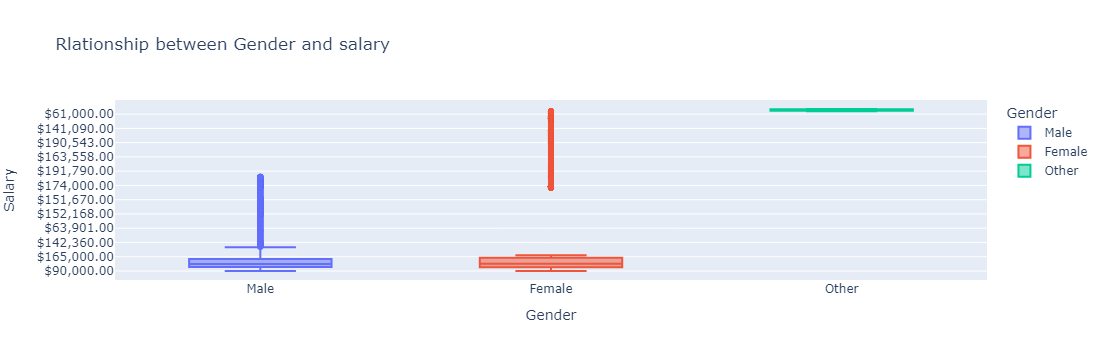

In [19]:
fig = px.box(df, x="Gender", y="Salary", title='Rlationship between Gender and salary ',color='Gender')
fig.show()
img = Image.open('images/newplot 1.png')
display(img)

### we can see median salary of female is 70k more than the male

# Analyzing the saalary of Male according to their age

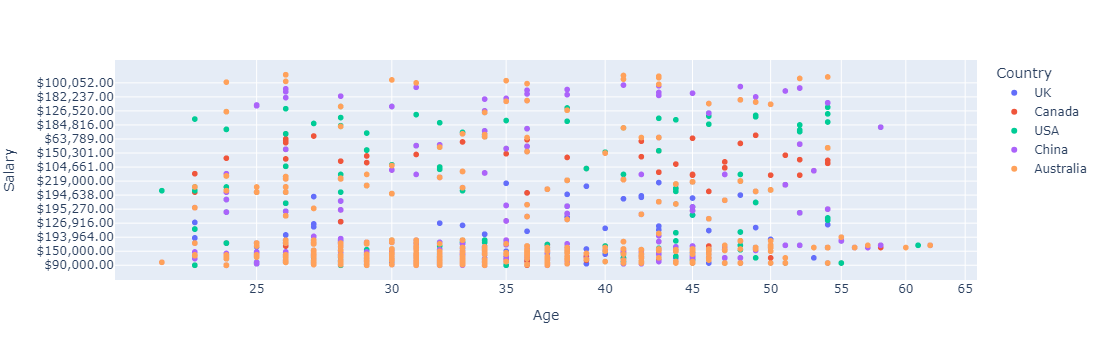

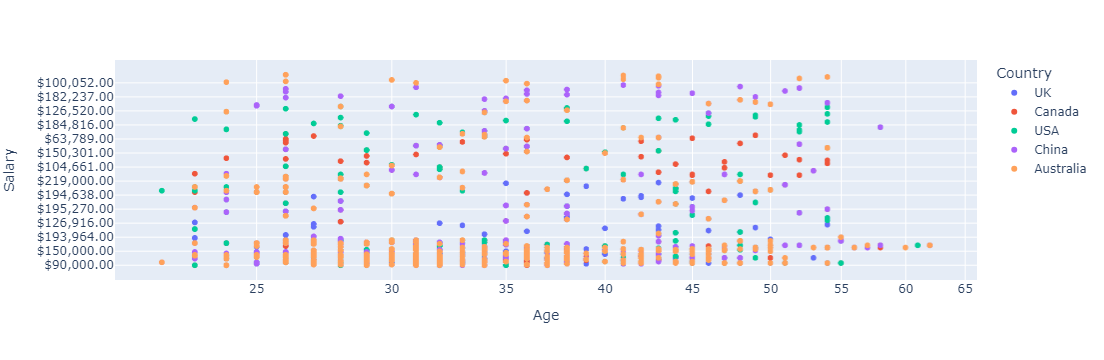

In [20]:
fig  = px.scatter(df[df['Gender']=="Male"],x='Age', y = 'Salary', color='Country', hover_name = 'Country', log_x=True)
fig.show()
img = Image.open('images/newplot 2.png')
display(img)

# Analyzing the salary of Female according to their age

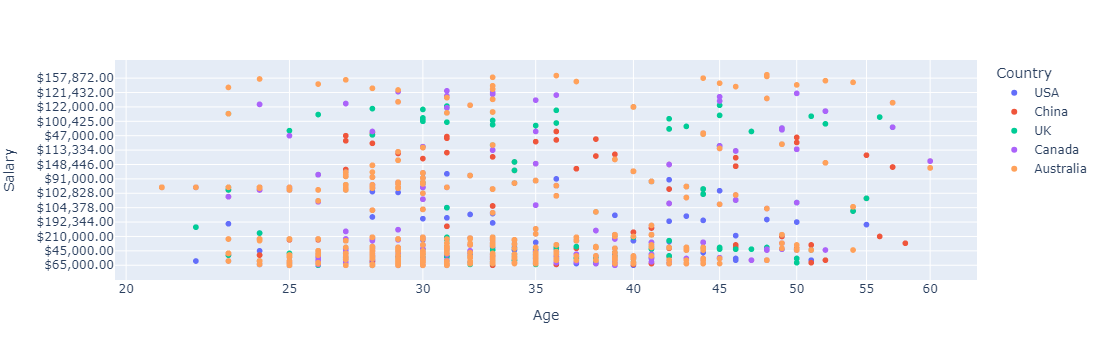

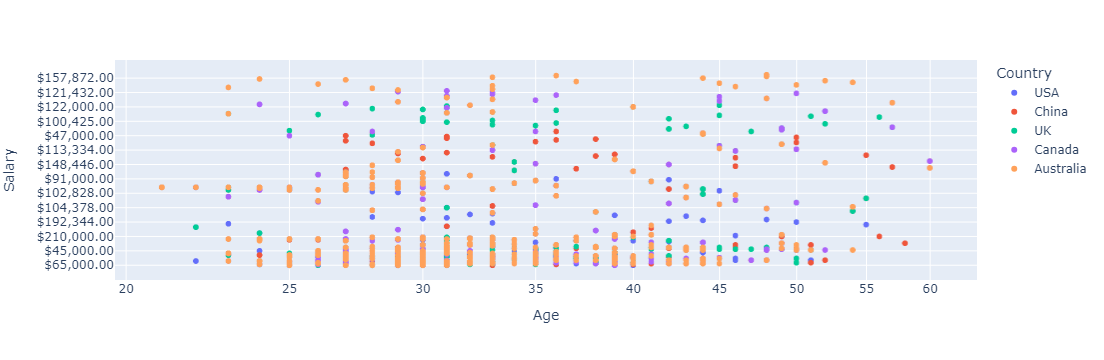

In [21]:
fig  = px.scatter(df[df['Gender']=="Female"],x='Age', y = 'Salary', color='Country', hover_name = 'Country', log_x=True)
fig.show()
img = Image.open('images/newplot 3.png')
display(img)

# Analyzing Salary with respect to the Year of Experience

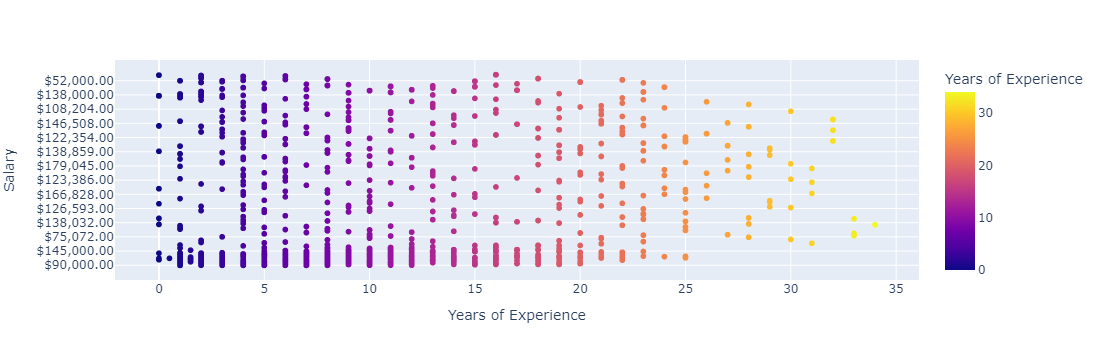

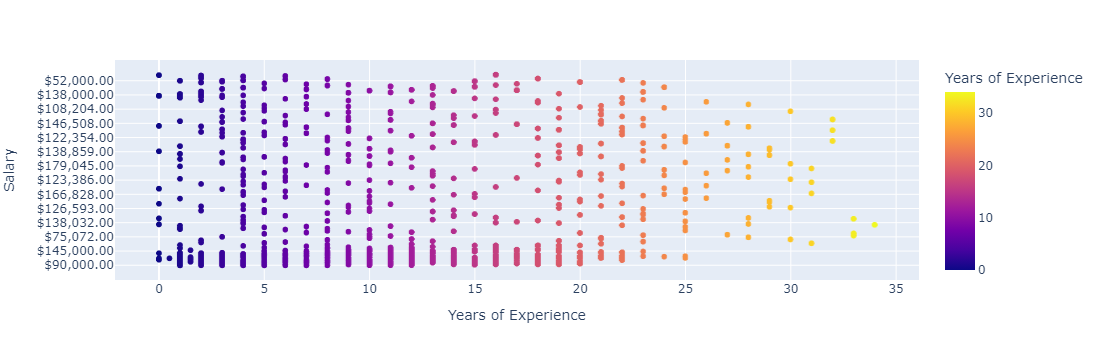

In [22]:
fig = px.scatter(df, x='Years of Experience', y='Salary', color='Years of Experience')
fig.show()
img = Image.open('images/newplot 4.png')
display(img)

# Analyzing the Salary with respect of country

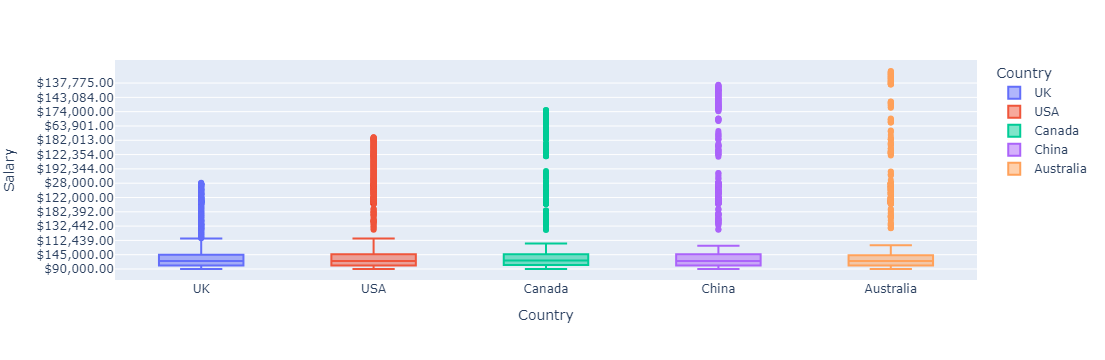

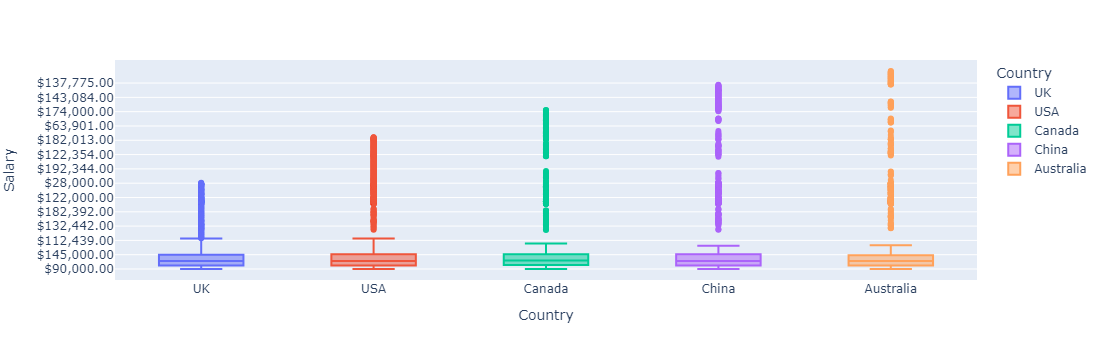

In [23]:
fig = px.box(df, x='Country',y='Salary',color='Country')
fig.show()
img = Image.open('images/newplot 5.png')
display(img)

###                                         Median salary of each country is similar

# Analyzing Salary with respect to race

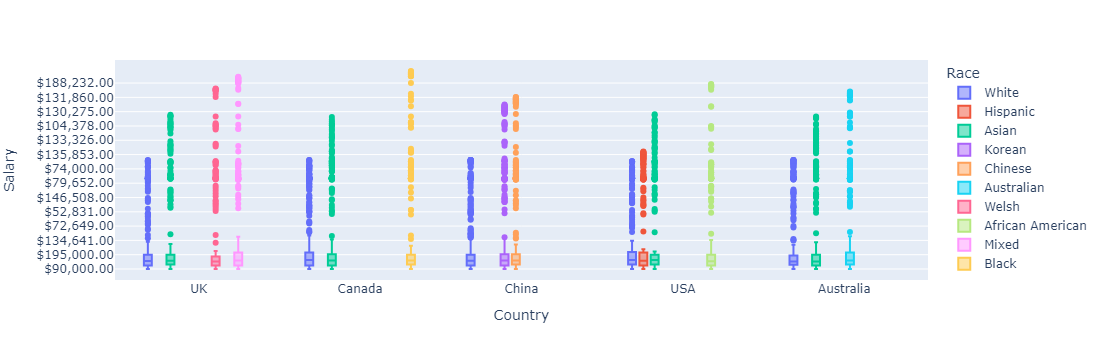

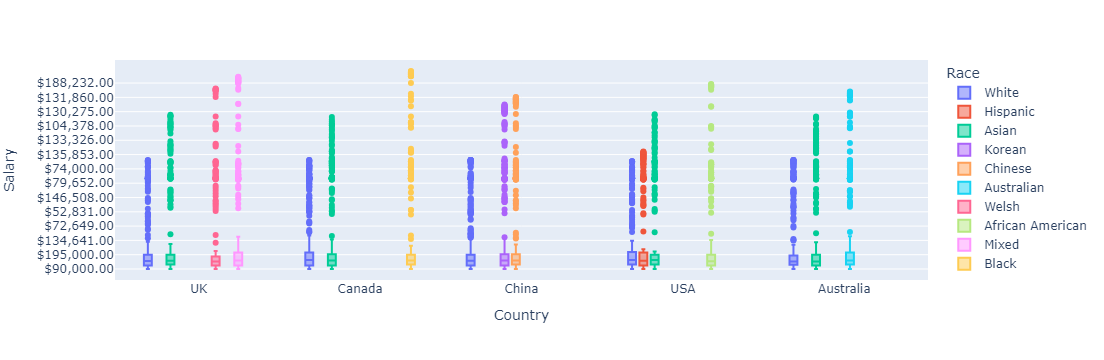

In [24]:
fig = px.box(df, x='Country', y='Salary', color='Race')
fig.show()
img = Image.open('images/newplot 6.png')
display(img)

# Top 10 jobs with numbers of Emloyee


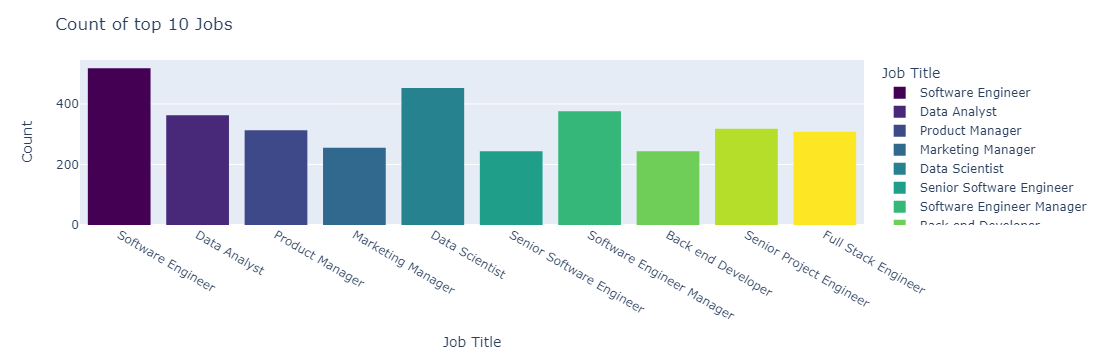

In [25]:
counts = df['Job Title'].value_counts().nlargest(10)
top_jobs = df[df['Job Title'].isin(counts.index)]
fig = px.histogram(top_jobs, x='Job Title', color='Job Title', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Count of top 10 Jobs', xaxis_title='Job Title', yaxis_title='Count')
fig.show()

# Analyzing Salary with their Age

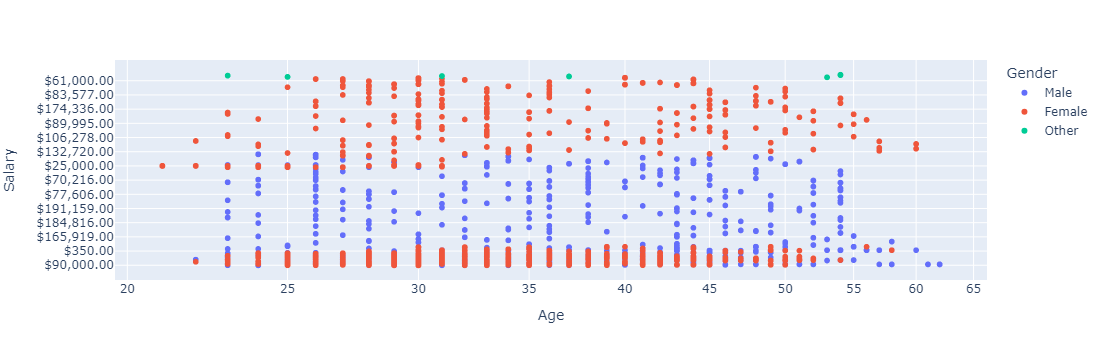

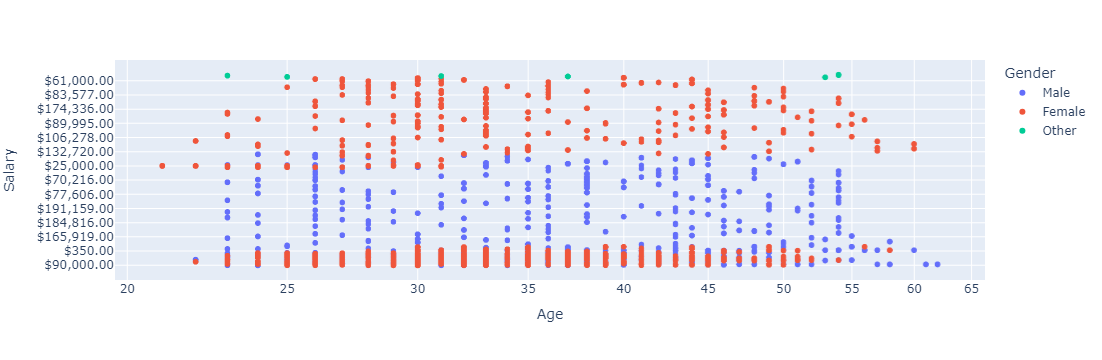

In [26]:
fig  = px.scatter(df,x='Age', y = 'Salary', color='Gender', hover_name = 'Gender', log_x=True)
fig.show()
img = Image.open('images/newplot 7.png')
display(img)

In [94]:
# Here I filter thoes job profiles where people are mojarly involved 
df_s = df['Job Title'].value_counts().reset_index()
df_s.columns = ['Job Title','count']
df_s = pd.DataFrame(df_s)
df_s = df_s[~df_s['count'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])]
print(df_s)
# so we get 51 job profiles

                           Job Title  count
0                  Software Engineer    518
1                     Data Scientist    453
2          Software Engineer Manager    376
3                       Data Analyst    363
4            Senior Project Engineer    318
5                    Product Manager    313
6                Full Stack Engineer    308
7                  Marketing Manager    255
8                 Back end Developer    244
9           Senior Software Engineer    244
10               Front end Developer    241
11             Marketing Coordinator    158
12            Junior Sales Associate    142
13                 Financial Manager    134
14                 Marketing Analyst    132
15                Software Developer    125
16                Operations Manager    114
17           Human Resources Manager    104
18             Director of Marketing     88
19                     Web Developer     87
20                 Research Director     75
21                  Product Desi

In [124]:
job_titles = ['Software Engineer', 'Data Scientist', 'Software Engineer Manager', 'Data Analyst', 'Senior Project Engineer', 
              'Product Manager', 'Full Stack Engineer', 'Marketing Manager', 'Back end Developer', 'Senior Software Engineer', 
              'Front end Developer', 'Marketing Coordinator', 'Junior Sales Associate', 'Financial Manager', 'Marketing Analyst', 
              'Software Developer', 'Operations Manager', 'Human Resources Manager', 'Director of Marketing', 'Web Developer', 
              'Research Director', 'Product Designer', 'Content Marketing Manager', 'Sales Associate', 
              'Senior Product Marketing Manager', 'Director of HR', 'Research Scientist', 'Marketing Director', 'Sales Director',
              'Senior Data Scientist', 'Junior HR Generalist', 'Junior Software Developer', 'Receptionist', 'Director of Data Science',
              'Sales Manager', 'Digital Marketing Manager', 'Junior Marketing Manager', 'Junior Software Engineer',
              'Human Resources Coordinator', 'Senior Research Scientist', 'Senior Human Resources Manager', 'Senior HR Generalist', 
              'Junior Web Developer', 'Junior Sales Representative', 'Financial Analyst', 'Sales Executive', 'Sales Representative',
              'Front End Developer', 'Junior HR Coordinator', 'Junior Data Analyst', 'Graphic Designer', 'Project Manager']


df1 = df[df['Job Title'].isin(job_titles)][['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary', 'Country']]
print(df1)

      Age  Gender Education Level              Job Title  Years of Experience  \
0      32    Male      Bachelor's      Software Engineer                  5.0   
1      28  Female        Master's           Data Analyst                  3.0   
3      36  Female      Bachelor's        Sales Associate                  7.0   
5      29    Male      Bachelor's      Marketing Analyst                  2.0   
6      42  Female        Master's        Product Manager                 12.0   
...   ...     ...             ...                    ...                  ...   
6695   49  Female             PhD  Director of Marketing                 20.0   
6696   32    Male     High School        Sales Associate                  3.0   
6697   30  Female      Bachelor's      Financial Manager                  4.0   
6698   46    Male        Master's      Marketing Manager                 14.0   
6699   26  Female     High School        Sales Executive                  1.0   

           Salary    Countr

In [125]:
#here you can see that there is a dollar sign in prefix of salary, first we have to change the element of this attribute in to numeric datatype
df1['Salary'] = df1['Salary'].replace('[\$,]', '', regex=True).astype(float)

In [126]:
# we perform label encoding and OneHotEncoding because our data set contain vrious diffderent datatypes
label_encoder = {}
col = ['Gender', 'Job Title']
for i in col:
    le = LabelEncoder()
    df1[i] = le.fit_transform(df1[i])
    label_encoder[i] = le

#saving labelencoding Directory
with open("D:\works\Git_hub\Salary-prediction-and-Analysis-based-on-country-and-race\encoding_directory.pkl",'wb') as f:
    pickle.dump(label_encoder,f)
        
# Use OneHotEncoder for multi-class categorical columns
df1 = pd.get_dummies(df1, columns=['Education Level', 'Country'])
df1 = df1.astype(int, errors='ignore')
df1

Age  Gender  Job Title  Years of Experience  Salary  \
0      32       1         49                    5   90000   
1      28       0          2                    3   65000   
3      36       0         36                    7   60000   
5      29       1         25                    2   55000   
6      42       0         31                   12  120000   
...   ...     ...        ...                  ...     ...   
6695   49       0          7                   20  200000   
6696   32       1         36                    3   50000   
6697   30       0          9                    4   55000   
6698   46       1         28                   14  140000   
6699   26       0         38                    1   35000   

      Education Level_Bachelor's  Education Level_High School  \
0                              1                            0   
1                              0                            0   
3                              1                            0   
5                              1                            0   
6                              0                            0   
...                          ...                          ...   
6695                           0                            0   
6696                           0                            1   
6697                           1                            0   
6698                           0                            0   
6699                           0                            1   

      Education Level_Master's  Education Level_PhD  Country_Australia  \
0                            0                    0                  0   
1                            1                    0                  0   
3                            0                    0                  0   
5                            0                    0                  0   
6                            1                    0                  0   
...                        ...                  ...                ...   
6695                         0                    1                  0   
6696                         0                    0                  1   
6697                         0                    0                  0   
6698                         1                    0                  0   
6699                         0                    0                  0   

      Country_Canada  Country_China  Country_UK  Country_USA  
0                  0              0           1            0  
1                  0              0           0            1  
3                  0              0           0            1  
5                  0              0           0            1  
6                  0              0           0            1  
...              ...            ...         ...          ...  
6695               0              0           1            0  
6696               0              0           0            0  
6697               0              1           0            0  
6698               0              1           0            0  
6699               1              0           0            0  

[6361 rows x 14 columns]

In [127]:
#Scaling
scaler = StandardScaler()
df1[['Age', 'Years of Experience']] = scaler.fit_transform(df1[['Age', 'Years of Experience']])

In [128]:
# here dividing dataframe into dependent and independent variable
x = df1.drop(["Salary","Education Level_Bachelor's","Country_Australia"], axis = 1)
y = df1['Salary']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [130]:
model =  LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [131]:
import pickle
with open ('D:\works\Git_hub\Salary-prediction-and-Analysis-based-on-country-and-race\model.pkl', 'wb') as f:
    pickle.dump(model,f)

In [132]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_lin = model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_r2 = r2_score(y_test, y_pred_lin)
print(f'Linear Regression MSE: {lin_mse:.2f}, R2: {lin_r2:.2f}')

Linear Regression MSE: 814071981.55, R2: 0.71


In [133]:
model.score(X_test, y_test)

0.706664841664215